# Web Scraping: https://quotes.toscrape.com/

In [1]:
%pip install requests beautifulsoup4 matplotlib wordcloud textblob > nul

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.parse import urljoin
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [3]:
# Send HTTP Request & Get HTML Request
url = 'https://quotes.toscrape.com/'
response = requests.get(url)
html_content = response.content

In [4]:
# Parse HTML
soup = BeautifulSoup(html_content, 'html.parser')

In [5]:
# Extract Quotes
quotes = soup.find_all('span', class_='text')
for quote in quotes:
    print(quote.get_text())

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [6]:
for quote in quotes:
    text = quote.get_text()
    author = quote.find_next('small', class_='author').get_text()
    tags = [tag.get_text() for tag in quote.find_next('div', class_='tags').find_all('a', class_='tag')]
    print(f'Quote: {text}\nAuthor: {author}\nTags: {tags}')

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']
Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']
Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']
Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']
Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']
Quote: “Try not to become a man of success. Rather become a man o

Full Analysis

In [7]:
def scrape_quotes(url):
    response = requests.get(url)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')

    quotes = soup.find_all('span', class_='text')

    data = {'Quotes': [], 'Authors': [], 'Tags': []}

    for quote in quotes:
        text = quote.get_text()
        author = quote.find_next('small', class_='author').get_text()
        tags = [tag.get_text() for tag in quote.find_next('div', class_='tags').find_all('a', class_='tag')]
        print(f'Quote: {text}\nAuthor: {author}\nTags: {tags}')

        data['Quotes'].append(text)
        data['Authors'].append(author)
        data['Tags'].extend(tags)

    next_button = soup.find('li', class_='next')
    return data, next_button.find('a')['href'] if next_button else None

# Starting URL
base_url = "https://quotes.toscrape.com/"
current_url = base_url

all_data = {'Quotes': [], 'Authors': [], 'Tags': []}

# Scrape quotes from each page
while current_url:
    data, next_url = scrape_quotes(current_url)
    if data:
        all_data['Quotes'].extend(data['Quotes'])
        all_data['Authors'].extend(data['Authors'])
        all_data['Tags'].extend(data['Tags'])
    if next_url:
        current_url = urljoin(base_url, next_url)  # absolute URL
    else:
        current_url = None

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']
Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']
Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']
Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']
Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']
Quote: “Try not to become a man of success. Rather become a man o

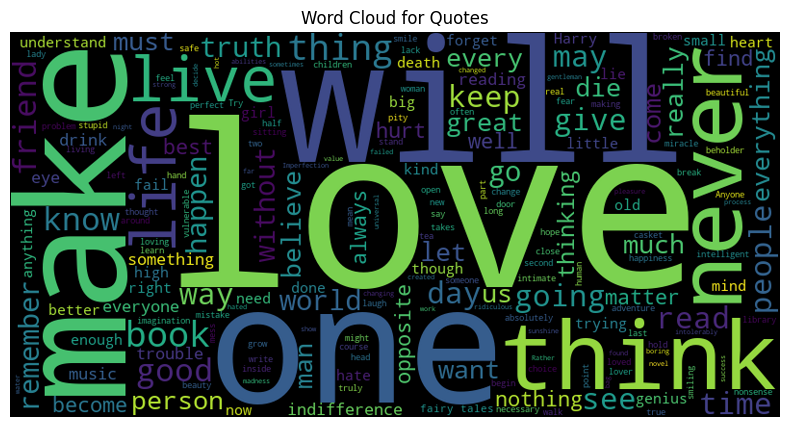

In [8]:
# WordCloud for Quotes
quotes_text = ' '.join(all_data['Quotes'])
wordcloud_quotes = WordCloud(width=800, height=400, background_color='black').generate(quotes_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_quotes, interpolation='spline16')
plt.title('Word Cloud for Quotes')
plt.axis('off')
plt.show()

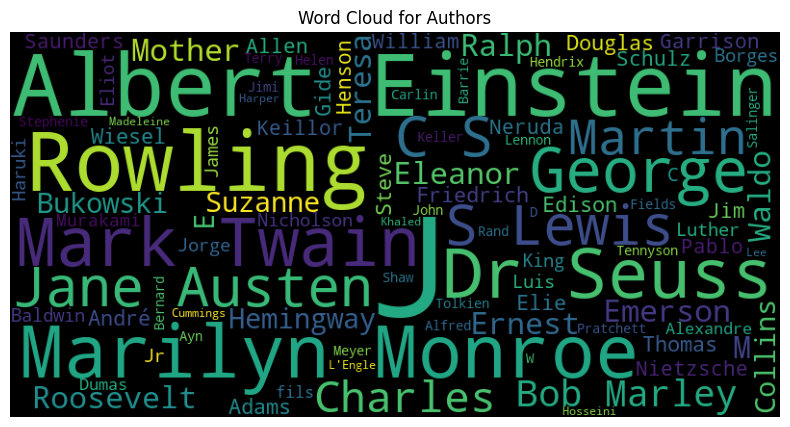

In [9]:
# WordCloud for Authors
authors_text = ' '.join(all_data['Authors'])
wordcloud_authors = WordCloud(width=800, height=400, background_color='black').generate(authors_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_authors, interpolation='hermite')
plt.title('Word Cloud for Authors')
plt.axis('off')
plt.show()

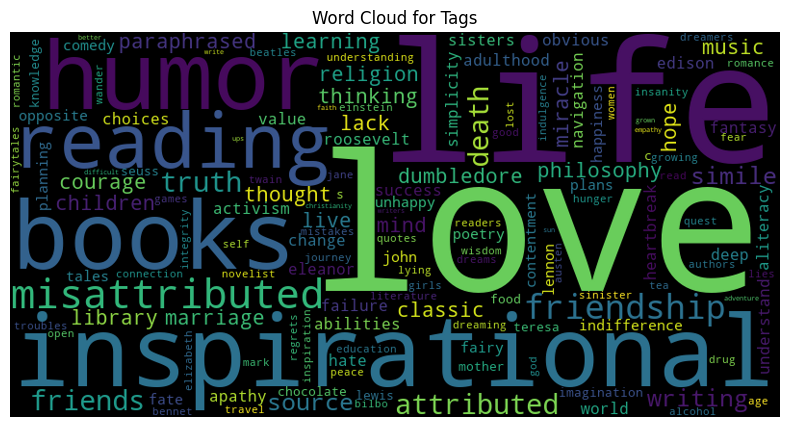

In [10]:
# WordCloud for Tags
tags_text = ' '.join(all_data['Tags'])
wordcloud_tags = WordCloud(width=800, height=400, background_color='black').generate(tags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags, interpolation='catrom')
plt.title('Word Cloud for Tags')
plt.axis('off')
plt.show()

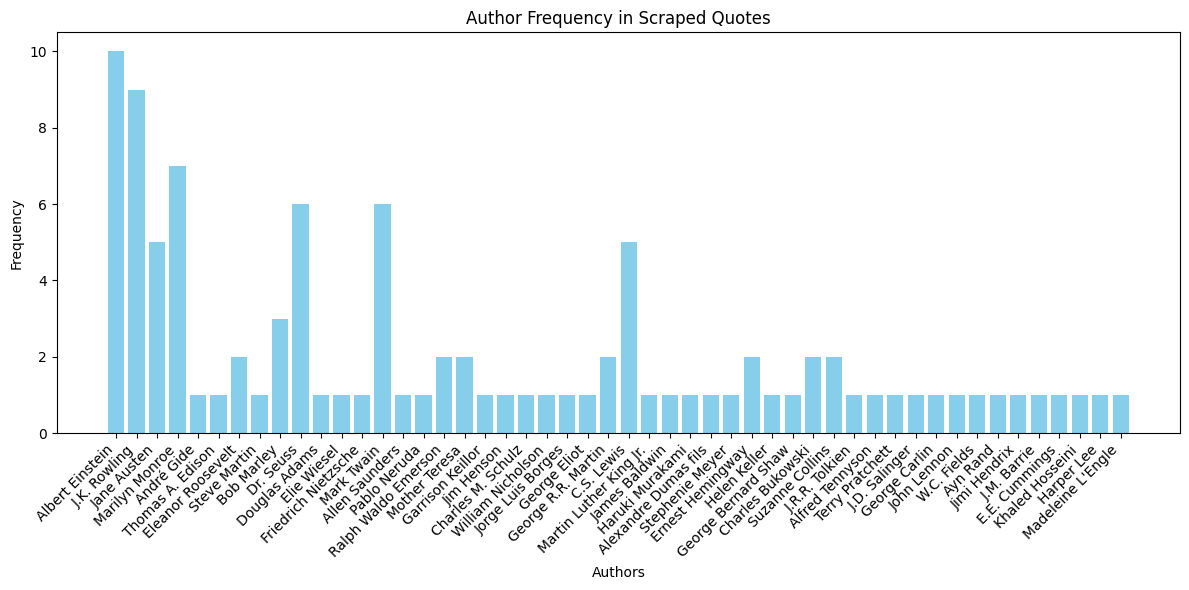

In [11]:
# Frequency of each author
author_frequency = Counter(all_data['Authors'])

# Data for the bar chart
authors = list(author_frequency.keys())
frequency = list(author_frequency.values())

plt.figure(figsize=(12, 6))
plt.bar(authors, frequency, color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Frequency')
plt.title('Author Frequency in Scraped Quotes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

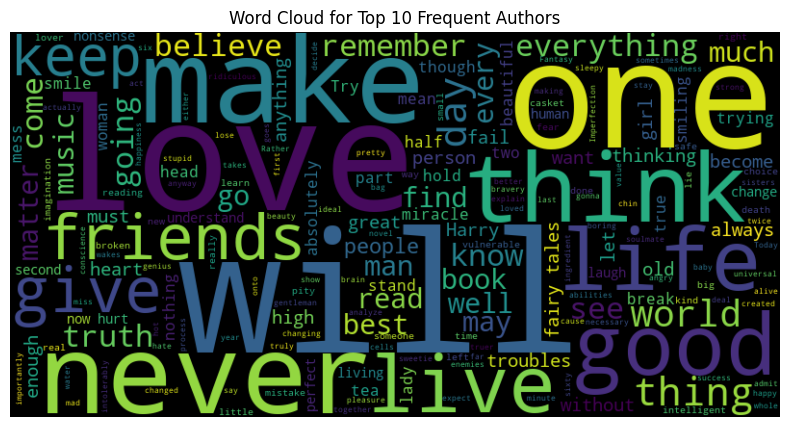

In [12]:
# Get the top 10 frequent authors
top_authors = [author[0] for author in author_frequency.most_common(10)]

# Extract quotes for the top authors
top_author_quotes = [quote for quote, author in zip(all_data['Quotes'], all_data['Authors']) if author in top_authors]

# Combine quotes for word cloud
top_author_text = ' '.join(top_author_quotes)

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(top_author_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 Frequent Authors')
plt.axis('off')
plt.show()

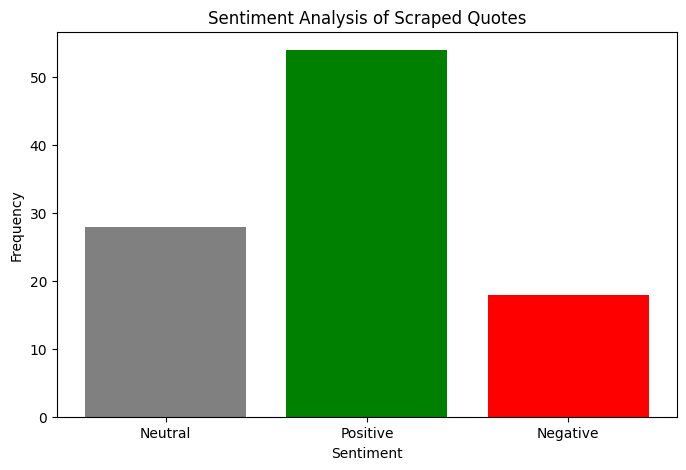

In [13]:
# Perform sentiment analysis on each quote
sentiments = [TextBlob(quote).sentiment.polarity for quote in all_data['Quotes']]

# Categorize sentiments into positive, negative, and neutral
sentiment_categories = ['Positive' if s > 0 else 'Negative' if s < 0 else 'Neutral' for s in sentiments]

# Count the occurrences of each sentiment category
sentiment_counts = Counter(sentiment_categories)

labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['gray', 'green', 'red'])
plt.title('Sentiment Analysis of Scraped Quotes')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()